In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd

In [2]:
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
X_test.shape


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(10000, 28, 28)

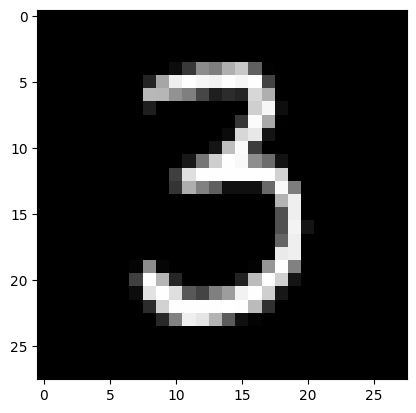

In [4]:
single_image= X_train[50]
single_image.shape
plt.imshow(single_image,cmap='gray')

In [6]:
y_train.shape
X_train.min()
X_train.max()
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0
X_train_scaled.min()
X_train_scaled.max()
y_train[0]

5

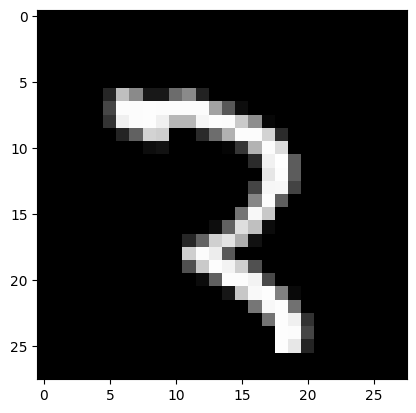

In [7]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)
type(y_train_onehot)
y_train_onehot.shape
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')
y_train_onehot[500]
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)
model = keras.Sequential()

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 35ms/step - accuracy: 0.7847 - loss: 0.6645 - val_accuracy: 0.9691 - val_loss: 0.1061
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.9716 - loss: 0.0962 - val_accuracy: 0.9787 - val_loss: 0.0685
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9794 - loss: 0.0658 - val_accuracy: 0.9816 - val_loss: 0.0573
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 34ms/step - accuracy: 0.9844 - loss: 0.0520 - val_accuracy: 0.9838 - val_loss: 0.0509
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 34ms/step - accuracy: 0.9873 - loss: 0.0405 - val_accuracy: 0.9835 - val_loss: 0.0499
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[[ 974    0    1    0    0    0    3    0    1    1]
 [   0 1132    0    0    0    0    2    0    1    0]
 [   1    5 1012    3    2    0    1    6    2    0]
 [   0    0    4 1000    0    0    0    2    3    1]
 [   0    0    0    1  966    0    1    3    1   10]
 [   3    0    0   12    0  861    5    1    1   

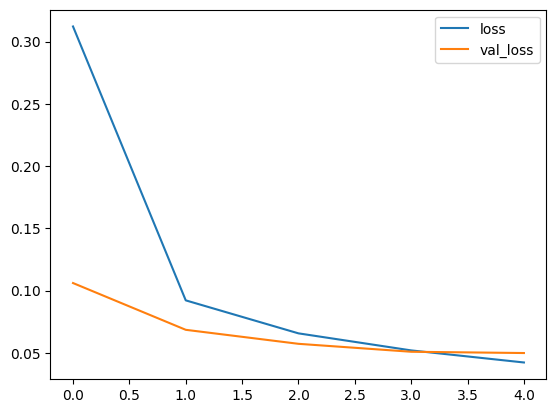

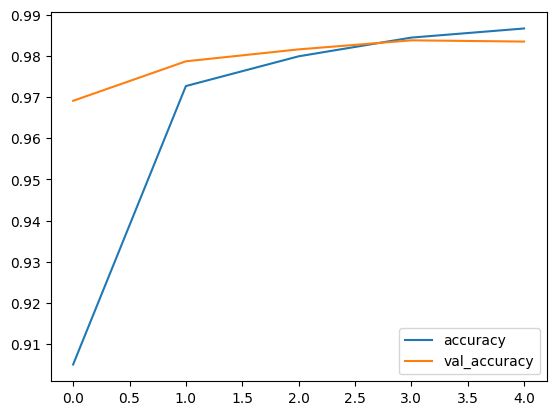

In [8]:
input = keras.Input(shape=(28,28,1))
model.add(input)
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding='valid',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64, validation_data=(X_test_scaled,y_test_onehot))
metrics = pd.DataFrame(model.history.history)
metrics.head()
metrics[['loss','val_loss']].plot()
metrics[['accuracy','val_accuracy']].plot()
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))


In [12]:
img = image.load_img('deep pic.jpeg')
type(img)
img = image.load_img('deep pic.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [13]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [14]:
print(x_single_prediction)
print("Yuvadarshini S 212221230126")


[8]
Yuvadarshini S 212221230126


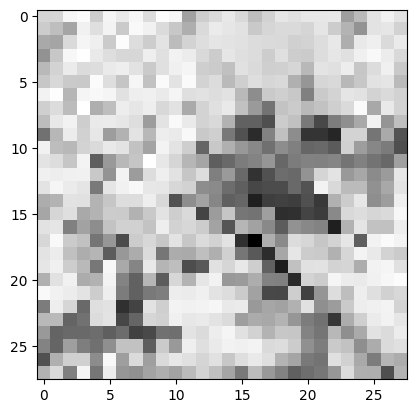

In [15]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


In [16]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[3]
